# MÓDULO 15 - Análise - A segunda etapa da Pré Modelagem

## 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from bokeh.plotting import figure
from pandas import read_csv
from sympy.abc import lamda

In [16]:
df = read_csv('tarefam14.csv', delimiter=';')
df.head()

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Celular,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,F,False,True,False,1,False,DSL,False,False,False,MONTH-TO-MONTH,ELECTRONIC CHECK,29.850000,29.85,False
1,M,False,False,False,34,True,DSL,True,False,False,ONE YEAR,MAILED CHECK,56.950000,1889.50,False
2,M,False,False,False,2,True,DSL,True,False,False,MONTH-TO-MONTH,MAILED CHECK,53.850000,108.15,True
3,M,False,False,False,45,False,DSL,True,True,False,ONE YEAR,BANK TRANSFER (AUTOMATIC),65.607563,1840.75,False
4,F,False,False,False,52,True,NO,True,True,True,ONE YEAR,MAILED CHECK,65.607563,1022.95,False


## 2) Comece pela análise univariada
### A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

In [17]:
df.describe().round(2)

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.00,2488.00,2488.00
mean,32.35,65.61,2290.09
std,24.64,27.98,2264.59
min,0.00,18.40,18.80
25%,8.00,45.40,402.34
50%,29.00,65.61,1402.90
75%,56.00,87.71,3867.16
max,72.00,118.65,8564.75


1. Nota-se em `Pagamento_Mensal` que a mediana tem o mesmo valor que a média, indicando a possível presença de uma **distribuição normal**.

### B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

Aprendemos em sala que uma das formas de identificar a presença de _outliers_ seria diferença entre a média e a mediana. Analisando os dados fornecidos pela função `describe()`, podemos observar a possível presença de _outliers_, principalmente em `Tempo_como_cliente` e `Total_Pago`.


### C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.


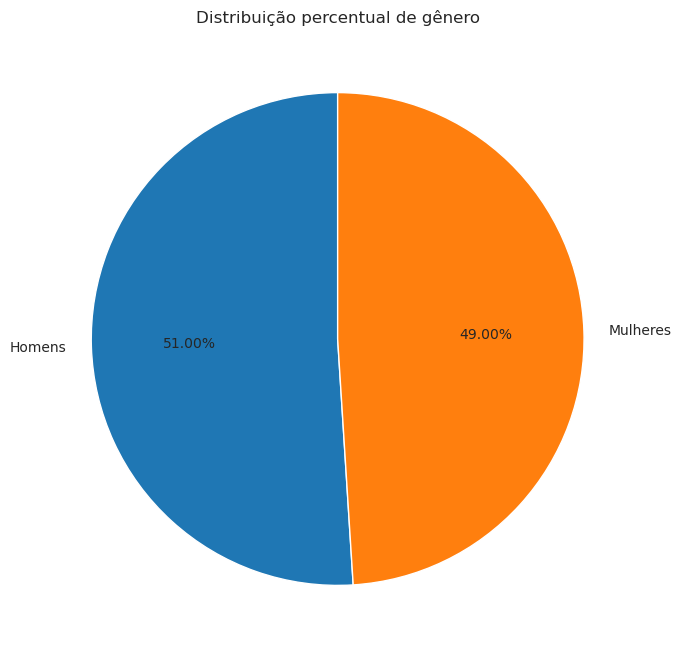

In [18]:
# Distribuição percentual de gênero

plt.figure(figsize=(8, 8))
valores_genero = df['Genero'].value_counts()
labels_genero = list(map(lambda k: 'Homens' if k == 'M' else 'Mulheres', valores_genero.index))
plt.pie(valores_genero.values, labels=labels_genero, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de gênero")
plt.show()


**Análise:** Podemos notar que a proporção de pessoas de gênero masculino e feminino está balanceada

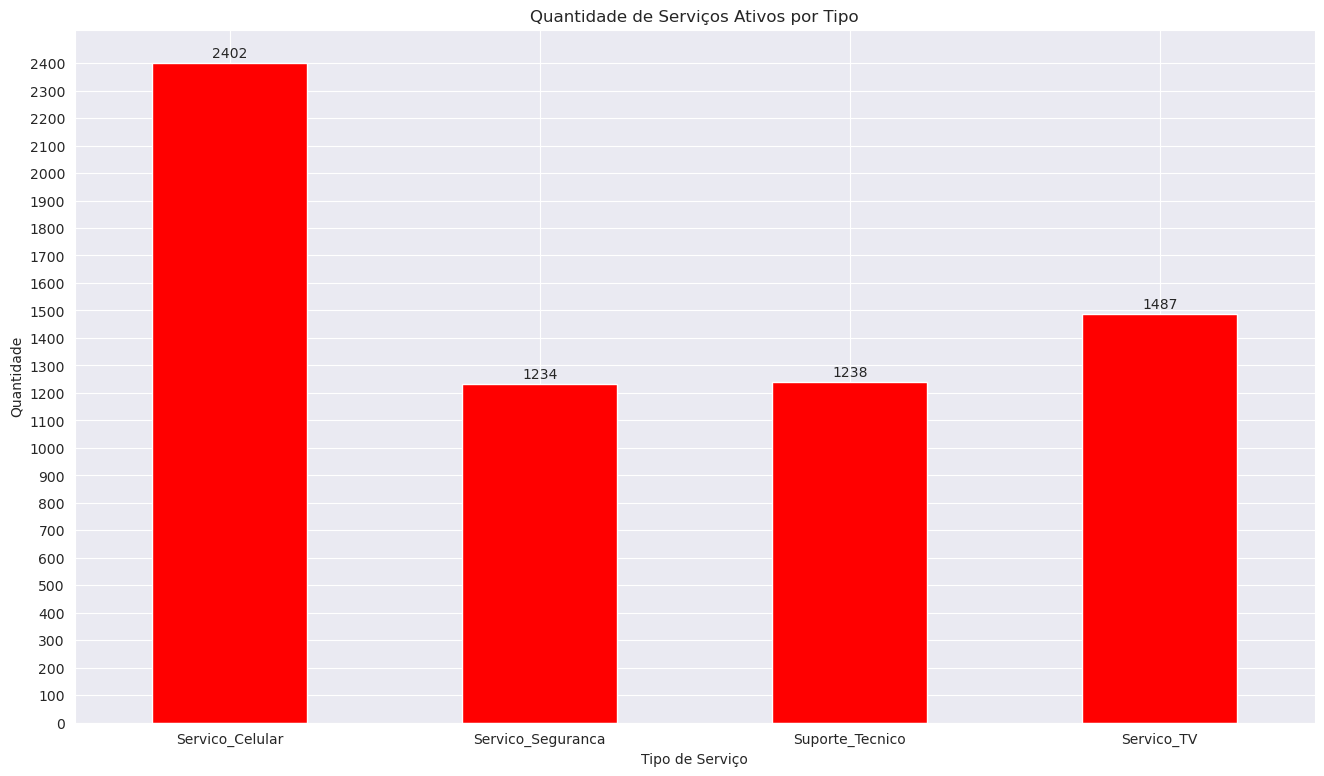

In [19]:
# Análise em relação a serviços

df_servicos_prestados = df[['Servico_Celular', 'Servico_Seguranca', 'Suporte_Tecnico', 'Servico_TV']]

plt.figure(figsize=(16, 9))
df_servicos_prestados[df_servicos_prestados == True].sum().plot(kind='bar', color='r')
plt.title('Quantidade de Serviços Ativos por Tipo')
plt.xlabel('Tipo de Serviço')
plt.ylabel('Quantidade')
plt.yticks(range(0, 2500, 100))
plt.xticks(rotation=0)

# Adicionar valores em cima das barras
quantidades = df_servicos_prestados[df_servicos_prestados == True].sum()
for i, v in enumerate(quantidades):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

**Análise:** Todos os serviços prestados, fora o Serviço telefônico, tem valores próximo. O que é um bom sinal, já que, podemos afirmar que:
1. Nenhum serviço precisa de uma atenção especial devido ao número de aquisição baixo;
2. A quantidade de suporte técnico é pequena ao ser comparado com a soma dos serviços oferecidos, ou seja, os serviços não tem uma taxa alta de problemas.

### D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

**Observação:** Optei pelo uso de gráficos de pizza ao invés de gráfico de barras, pois ele é mais adequado para este tipo de análise.

Variáveis do tipo `boleean`, podem assumir dois valores (`True` ou `False`). Nas aulas passadas, aprendemos que o gráfico de pizza é adequado quando temos até duas variáveis e queremos ver a proporção dela na nossa base de dados. Note que é justamente o que queremos analisar no exercício, dessa forma, está justificada devidamente a escolha.

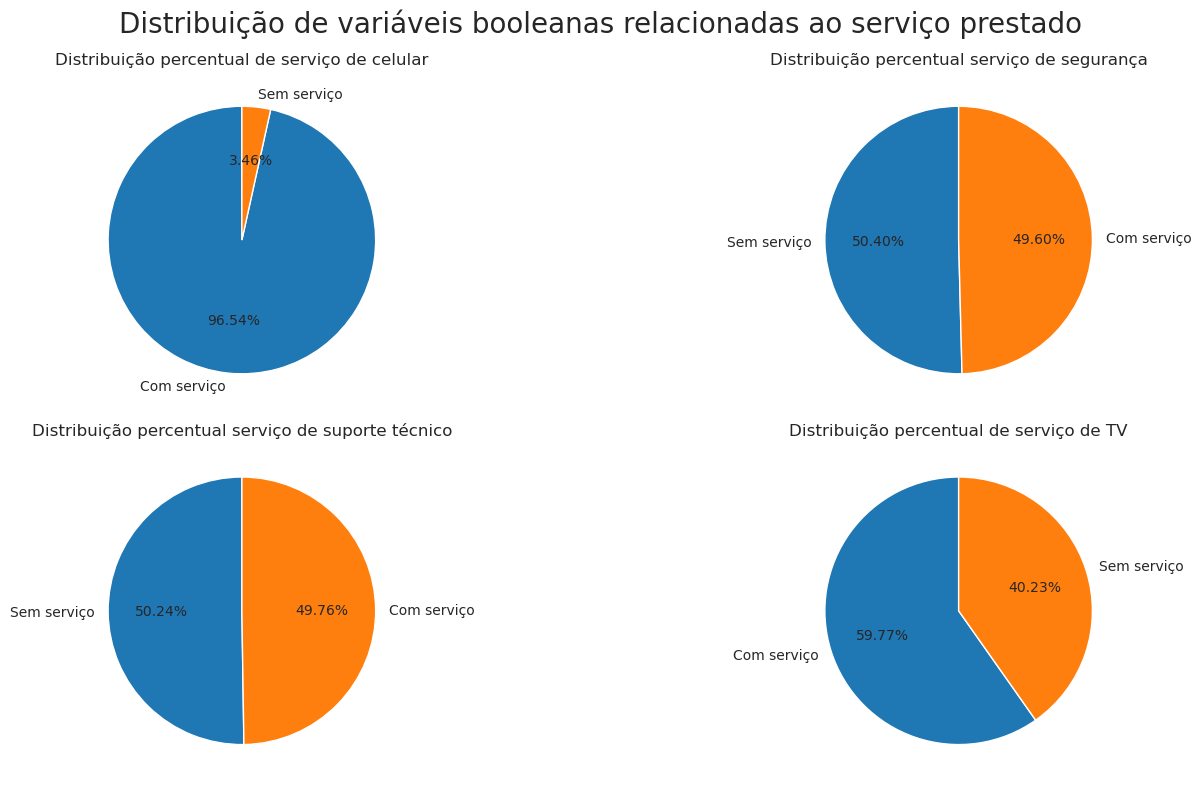

In [20]:
plt.figure(figsize=(16, 8))
plt.suptitle("Distribuição de variáveis booleanas relacionadas ao serviço prestado", fontsize=20)

# Serviço de celular
valores_servico_celular = df['Servico_Celular'].value_counts()
labels_servico_celular = list(map(lambda k: 'Com serviço' if k == 1 else 'Sem serviço', valores_servico_celular.index))

plt.subplot(2, 2, 1)
plt.pie(valores_servico_celular.values, labels=labels_servico_celular, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de serviço de celular")

# Serviço de segurança
valores_servico_seguranca = df['Servico_Seguranca'].value_counts()
labels_servico_seguranca = list(map(lambda k: 'Com serviço' if k == 1 else 'Sem serviço', valores_servico_seguranca.index))

plt.subplot(2, 2, 2)
plt.pie(valores_servico_seguranca.values, labels=labels_servico_seguranca, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual serviço de segurança")

# Suporte técnico
valores_suporte_tecnico = df['Suporte_Tecnico'].value_counts()
labels_suporte_tecnico = list(map(lambda k: 'Com serviço' if k == 1 else 'Sem serviço', valores_suporte_tecnico.index))

plt.subplot(2, 2, 3)
plt.pie(valores_suporte_tecnico.values, labels=labels_suporte_tecnico, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual serviço de suporte técnico")

# Suporte técnico
valores_servico_tv = df['Servico_TV'].value_counts()
labels_servico_tv = list(map(lambda k: 'Com serviço' if k == 1 else 'Sem serviço', valores_servico_tv.index))

plt.subplot(2, 2, 4)
plt.pie(valores_servico_tv.values, labels=labels_servico_tv, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de serviço de TV")

plt.tight_layout()
plt.show()

**Em relação às variáveis booleanas relacionas a serviços prestados, temos que a distribuição percentual de suporte técnico e serviços de segurança está bem balanceada. Enquanto a distribuição percentual de serviço de TV está ligeramente desbalanceada (proporção 60/40). Por fim, a distribuição de serviço de celular está totalmente desbalanceada.

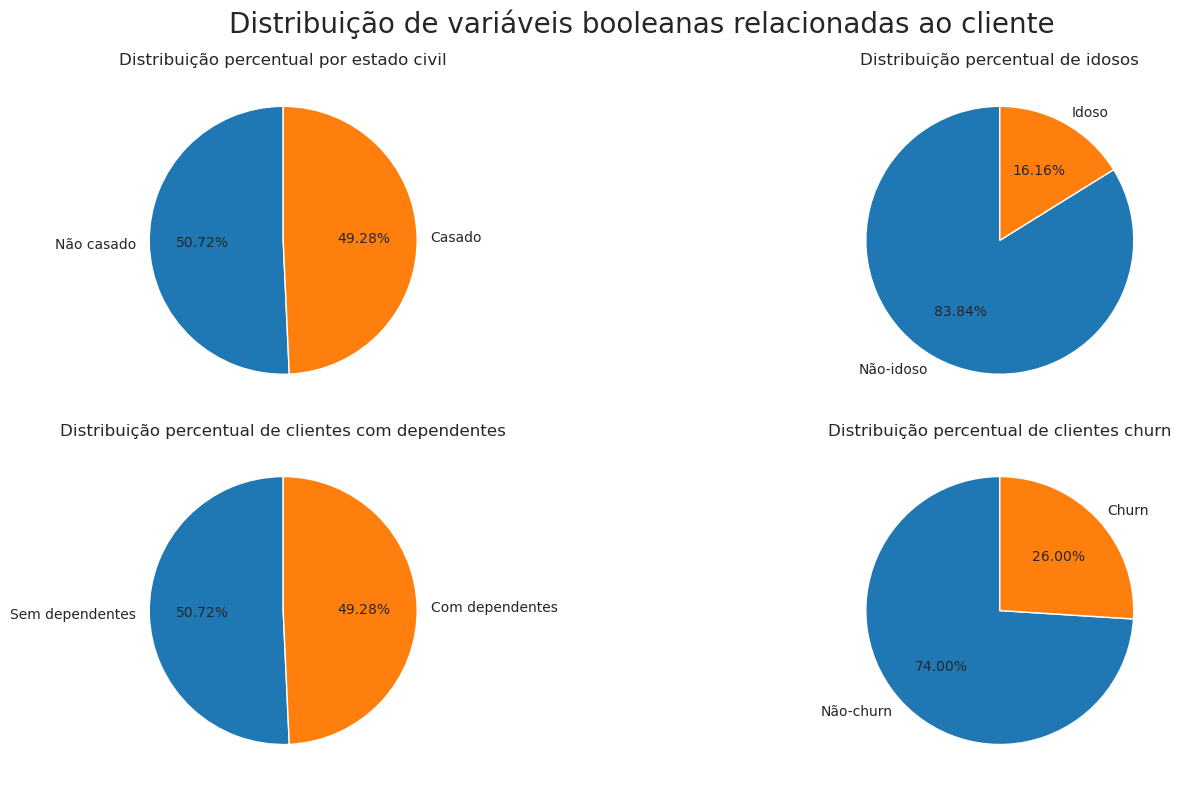

In [21]:
plt.figure(figsize=(16, 8))
plt.suptitle("Distribuição de variáveis booleanas relacionadas ao cliente", fontsize=20)

# Estado Civil
valores_casado = df['Casado'].value_counts()
labels_casado = list(map(lambda k: 'Casado' if k == 1 else 'Não casado', valores_casado.index))

plt.subplot(2, 2, 1)
plt.pie(valores_casado.values, labels=labels_casado, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual por estado civil")

# Idoso
valores_idoso = df['Idoso'].value_counts()
labels_idoso = list(map(lambda k: 'Idoso' if k == 1 else 'Não-idoso', valores_idoso.index))

plt.subplot(2, 2, 2)
plt.pie(valores_idoso.values, labels=labels_idoso, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de idosos")

# Dependentes
valores_dependentes = df['Dependentes'].value_counts()
labels_dependentes = list(map(lambda k: 'Com dependentes' if k == 1 else 'Sem dependentes', valores_dependentes.index))

plt.subplot(2, 2, 3)
plt.pie(valores_casado, labels=labels_dependentes, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de clientes com dependentes")

# Churn
valores_churn = df['Churn'].value_counts()
labels_churn = list(map(lambda k: 'Churn' if k == 1 else 'Não-churn', valores_churn.index))

plt.subplot(2, 2, 4)
plt.pie(valores_churn, labels=labels_churn, autopct='%.2f%%', startangle=90)
plt.title("Distribuição percentual de clientes churn")

plt.tight_layout()
plt.show()

**Análise:** Para as variáveis relacionadas à informações de cliente, temos que: a distribuição com base no estado civil e da existência de dependentes está balanceada, enquanto a distribuição de clientes classificados como churn/ não churn e clientes idosos/ não idosos não está balanceada.

## 3) Identifique e trate as colunas que contém outliers.


In [22]:
# Coluna tempo como cliente
q1_tcc = df['Tempo_como_Cliente'].quantile(0.25)
q3_tcc = df['Tempo_como_Cliente'].quantile(0.75)
iqr_tcc = q3_tcc - q1_tcc
limite_superior_tcc = q3_tcc + 1.5 * iqr_tcc
limite_inferior_tcc = q1_tcc - 1.5 * iqr_tcc
contador_outlier_tcc = 0
for i in range(len(df)):
    valor = df['Tempo_como_Cliente'][i]
    if valor < limite_inferior_tcc or valor > limite_superior_tcc:
        contador_outlier_tcc += 1

print("Temos {} outliers na coluna Tempo_como_Cliente".format(contador_outlier_tcc))

# Coluna Pagamento Mensal
q1_pm = df['Pagamento_Mensal'].quantile(0.25)
q3_pm = df['Pagamento_Mensal'].quantile(0.75)
iqr_pm = q3_tcc - q1_tcc
limite_superior_pm = q3_tcc + 1.5 * iqr_tcc
limite_inferior_pm = q1_tcc - 1.5 * iqr_tcc
contador_outlier_pm = 0

for i in range(len(df)):
    valor = df['Pagamento_Mensal'][i]
    if valor < limite_inferior_pm or valor > limite_superior_pm:
        contador_outlier_pm += 1
print("Temos {} outliers na coluna Pagamento_Mensal".format(contador_outlier_pm))

# Coluna Total pago
q1_tp = df['Total_Pago'].quantile(0.25)
q3_tp = df['Total_Pago'].quantile(0.75)
iqr_tp = q3_tp - q1_tp
limite_superior_tp = q3_tp + 1.5 * iqr_tp
limite_inferior_tp = q1_tp - 1.5 * iqr_tp
contador_outlier_tp = 0

for i in range(len(df)):
    valor = df['Total_Pago'][i]
    if valor < limite_inferior_tp or valor > limite_superior_tp:
        contador_outlier_tp += 1
print("Temos {} outliers na coluna Total_Pago".format(contador_outlier_tp))


Temos 0 outliers na coluna Tempo_como_Cliente
Temos 0 outliers na coluna Pagamento_Mensal
Temos 0 outliers na coluna Total_Pago


## 4) Realize a etapa da análise bivariada:
### A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

### ANÁLISE EM RELAÇÃO A CARACTERÍSTICAS DO CLIENTE

In [23]:
fig1 = px.histogram(df, x='Churn', color='Genero', barmode='stack')
fig1.update_layout(title='Relação entre Churn e Gênero', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Gênero')

fig2 = px.histogram(df, x='Churn', color='Idoso', barmode='stack')
fig2.update_layout(title='Relação entre Churn e Idoso', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Idoso')

fig3 = px.histogram(df, x='Churn', color='Dependentes', barmode='stack')
fig3.update_layout(title='Relação entre Churn e Dependentes', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Dependentes')

fig4 = px.histogram(df, x='Churn', color='Casado', barmode='stack')
fig4.update_layout(title='Relação entre Churn e Casado', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Casado')

fig1.show()
fig2.show()
fig3.show()
fig4.show()


**Análise:** No primeiro momento, separamos as variáveis relacionadas ao cliente para traçar o perfil de quem entra em churn. Para cada variável, analisamos, principalmente, a coluna onde o churn assume valor `True`. A partir dos dados obtidos, temos:
1. **Gênero:** A proporção de gênero está balanceada. Ou seja, **não** é uma variável que seja relevante para análise de churn;
2. **Idosos:** podemos dizer que o público não-idoso entra na condição de churn com mais frequência dos idosos
3. **Dependentes:** podemos inferir que aqueles que **não tem dependentes** são aqueles que mais entram em churn;
4. **Estado civil:** podemos dizer que pessoas não-casadas, são mais propensas a entrar em churn;

PERFIL: NÃO-IDOSO; SEM DEPENDENTES; NÃO-CASADOS

### ANÁLISE EM RELAÇÃO AOS SERVIÇOS PRESTADOS

In [24]:
fig5 = px.histogram(df, x='Churn', color='Servico_Celular', barmode='stack')
fig5.update_layout(title='Relação entre Churn e Serviço de celular', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Serviço de celular')

fig6 = px.histogram(df, x='Churn', color='Suporte_Tecnico', barmode='stack')
fig6.update_layout(title='Relação entre Churn e Suporte Técnico', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Suporte Técnico')

fig7 = px.histogram(df, x='Churn', color='Servico_Seguranca', barmode='stack')
fig7.update_layout(title='Relação entre Churn e Serviço de Seguranca', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Serviço de Seguranca')

fig8 = px.histogram(df, x='Churn', color='Servico_TV', barmode='stack')
fig8.update_layout(title='Relação entre Churn e Serviço de TV', xaxis_title='Churn', yaxis_title='Contagem', legend_title='Serviço de TV')

fig5.show()
fig6.show()
fig7.show()
fig8.show()



**ANÁLISE** Em relação aos serviços, temos que:
1. **Serviço de celular:** Pessoas em churn utilizam o serviço de celular em sua maioria;
2. **Suporte técnico:** Pessoas que *não* utilizam suporte técnico estão mais propensas a ser churn
3. **Serviço de sergurança:** Pessoas que *não* utilizam serviço de segurança estão mais propensas a ser churn;
4. **Serviço de TV:** Balanceado.

SERVIÇOS PARA TER ATENÇÃO: Serviços de celular;

*Observação:* Em relação ao suporte técnico e ao serviço de segurança, pelo fato de pessoas que estão em *churn* **não** utilizarem o serviço, não podemos dizer que é necessário chamar atenção.

### B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?
Respondido no exercício anterior.